No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


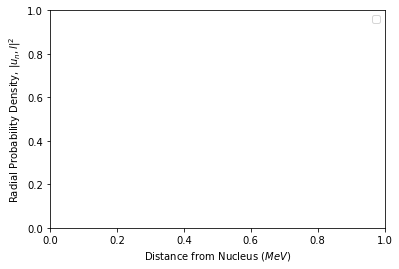

In [27]:
import numpy as np
import scipy as scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
r = np.linspace(0.0000001,15,1500) #GeV-1
q = np.linspace(0.0000001,7,730)
#constants
m1 = 1.275
m2 = 4.65
#GeV/c^2 Mass of the Chamarium
invmu = 1/m1 + 1/m2
mu = 1/invmu
u0 = np.array([0.,1.0]) #dots to make sure number is real
a = 0.225139389#dimensionless strong coupling constant optimised for the Bc Meson
b = 0.156286#0.1951228915397701 #GeV^2
def model_E(u,r,l,E):
    dvdr = (u[0]*l*(l+1))/(r**2) - 2*mu*u[0]*(E + ((4*a)/(3*r)) - b*r)
    return (u[1],dvdr)
def normalize_psi(psi, r):
    int_psi_square = scipy.integrate.simps((psi) ** 2, r)
    return psi/np.sqrt(int_psi_square)

def square_psi(psi):
    return (np.array(psi))**2
def turning_points(x):
    number_tps = 0
    for i in range(1, len(x)-1):
        if ((x[i-1] < x[i] and x[i+1] < x[i]) or (x[i-1] > x[i] and x[i+1] > x[i])):
            number_tps += 1
    return number_tps

def nodes(x):
    number_ns = 0
    for i in range(0, len(x)-1):
        if x[i]*x[i+1]<0:
            number_ns += 1
    return number_ns

def energy_iterate_graph(l,E1,E3):
    plt.xlabel("Distance from Nucleus ($MeV$)")
    plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    plt.legend(loc = "upper right")
    for i in range(100):
        E2 = 0.5*(E1 + E3)
        a = odeint(model_E,u0,r, args = (l,E1))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3))[:,0]  
        if turning_points(a) != turning_points(b) and nodes(a) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return b

oneS = normalize_psi(energy_iterate_graph(0,0.34,0.36),r)
oneP = normalize_psi(energy_iterate_graph(1,0.65,0.69),r)
oneD = normalize_psi(energy_iterate_graph(2,0.89,0.9),r)
twoS = normalize_psi(energy_iterate_graph(0,0.81,0.82),r)
twoP = normalize_psi(energy_iterate_graph(1,1,1.04),r)
threeS = normalize_psi(energy_iterate_graph(0,1.1,1.2),r)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


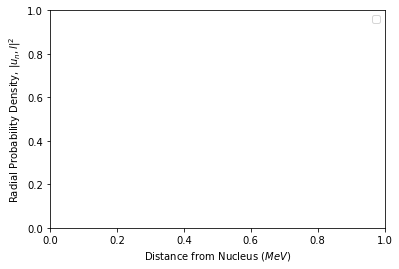

In [30]:
a = 0.25822825 #+ 0.050182435 #dimensionless strong coupling constant optimised for the Bc Meson
b = 0.173109555
oneS2 = normalize_psi(energy_iterate_graph(0,0.34,0.36),r)
twoS2 = normalize_psi(energy_iterate_graph(0,0.84,0.86),r)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


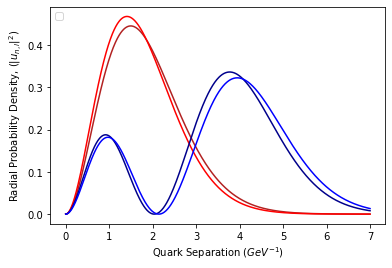

In [34]:



#fig = plt.figure()

#plt.style.use('dark_background')
#fig.patch.set_facecolor('red')
#ax = fig.add_subplot(111)

plt.legend(loc = "upper left")
plt.xlabel("Quark Separation ($GeV^{-1}$)", color = 'black')#, fontsize = 'large')
plt.ylabel("Radial Probability Density, $(|u_{n,l}|^2)$", color = 'black')#, fontsize = 'large')
#ax.tick_params(axis = 'x', colors = 'white')
#ax.tick_params(axis = 'y', colors = 'white')
ax.legend(loc = 'upper left', framealpha = 0, frameon = False, labelcolor = 'white', fontsize = 'large')


#ax.patch.set_alpha(0)
#ax.spines['bottom'].set_color('white')
#ax.spines['top'].set_color('white')
#ax.spines['left'].set_color('white')
#ax.spines['right'].set_color('white')
#plt.ylim([0, 0.6])
#plt.xlim([0,11])
plt.plot(q, square_psi(oneS)[:730], label = 'E = $0.3870 MeV$', color = "firebrick")
plt.plot(q, square_psi(oneS2)[:730], label = 'E = $0.3870 MeV$', color = "red")
#plt.plot(q, square_psi(twoP), label = 'E = $0.3870 MeV$', color = "black")
#plt.plot(q, square_psi(threeS), label = 'E = $0.3870 MeV$', color = "violet")
plt.plot(q, square_psi(twoS2)[:730], label = 'E = $0.3880 MeV$', color = 'darkblue')
plt.plot(q, square_psi(twoS)[:730], label = 'E = $0.3890 MeV$', color = "blue")
plt.savefig('Investigation Bottomonium.png', dpi = 1000,bbox_inches='tight')
plt.show()

In [2]:
time = []
def time_tick(interval):
    for i in range(2700):
        t = i*interval
        time.append(t)
    return time
time_tick(0.0166667)

[0.0,
 0.0166667,
 0.0333334,
 0.0500001,
 0.0666668,
 0.0833335,
 0.1000002,
 0.11666689999999999,
 0.1333336,
 0.1500003,
 0.166667,
 0.1833337,
 0.2000004,
 0.2166671,
 0.23333379999999998,
 0.2500005,
 0.2666672,
 0.28333389999999997,
 0.3000006,
 0.3166673,
 0.333334,
 0.3500007,
 0.3666674,
 0.3833341,
 0.4000008,
 0.41666749999999997,
 0.4333342,
 0.4500009,
 0.46666759999999996,
 0.4833343,
 0.500001,
 0.5166677,
 0.5333344,
 0.5500011,
 0.5666677999999999,
 0.5833345,
 0.6000012,
 0.6166678999999999,
 0.6333346,
 0.6500013,
 0.666668,
 0.6833347,
 0.7000014,
 0.7166681,
 0.7333348,
 0.7500015,
 0.7666682,
 0.7833349,
 0.8000016,
 0.8166683,
 0.8333349999999999,
 0.8500017,
 0.8666684,
 0.8833350999999999,
 0.9000018,
 0.9166685,
 0.9333351999999999,
 0.9500019,
 0.9666686,
 0.9833353,
 1.000002,
 1.0166686999999999,
 1.0333354,
 1.0500021,
 1.0666688,
 1.0833355,
 1.1000022,
 1.1166689,
 1.1333355999999999,
 1.1500023,
 1.166669,
 1.1833357,
 1.2000024,
 1.2166691,
 1.23333579